In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('fake reviews dataset.csv')

In [ ]:
df.sample(5)

,category,rating,label,text_
6470,Sports_and_Outdoors_5,5.0,CG,Years later and it's still here. The only reas...
22831,Pet_Supplies_5,5.0,OR,"Having shopped for more expensive dog booties,..."
35356,Toys_and_Games_5,2.0,CG,This is well made and looks great. It is a gr...
11237,Electronics_5,5.0,OR,This helps my network tremeendously in terms o...
21565,Pet_Supplies_5,5.0,CG,My puppy really likes this toy. The only probl...


In [ ]:
df.shape

(40432, 4)

# 1. Data Cleaning

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [ ]:
df.rename(columns={'text_':'text','label':'target'},inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.sample(5)

,category,rating,target,text
7649,Sports_and_Outdoors_5,2.0,1,I really wanted to like these as I read so man...
16469,Tools_and_Home_Improvement_5,5.0,1,"works great, really sharp, I usually lay them ..."
35805,Toys_and_Games_5,5.0,1,My daughter LOVES these girls! So far we have ...
16587,Tools_and_Home_Improvement_5,5.0,0,"There is not much to say about the design, jus..."
12530,Movies_and_TV_5,5.0,1,The imagery is amazing. My 6 year old and I l...


In [ ]:
df.isnull().sum()

category    0
rating      0
target      0
text        0
dtype: int64

In [ ]:
df.duplicated().sum()

12

In [ ]:
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

# 2.EDA

In [ ]:
df['target'].value_counts()

target
1    20215
0    20205
Name: count, dtype: int64

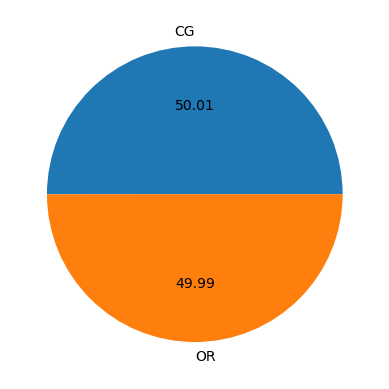

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['CG','OR'],autopct="%0.2f")
plt.show()

In [ ]:
# Data is balanced

In [ ]:
import nltk

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\Utsav
[nltk_data]     yadav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
df['num_characters'] = df['text'].apply(len)

In [ ]:
df.head()

,category,rating,target,text,num_characters
0,Home_and_Kitchen_5,5.0,0,"Love this! Well made, sturdy, and very comfor...",75
1,Home_and_Kitchen_5,5.0,0,"love it, a great upgrade from the original. I...",80
2,Home_and_Kitchen_5,5.0,0,This pillow saved my back. I love the look and...,67
3,Home_and_Kitchen_5,1.0,0,"Missing information on how to use it, but it i...",81
4,Home_and_Kitchen_5,5.0,0,Very nice set. Good quality. We have had the s...,85


In [ ]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,category,rating,target,text,num_characters,num_words
0,Home_and_Kitchen_5,5.0,0,"Love this! Well made, sturdy, and very comfor...",75,18
1,Home_and_Kitchen_5,5.0,0,"love it, a great upgrade from the original. I...",80,19
2,Home_and_Kitchen_5,5.0,0,This pillow saved my back. I love the look and...,67,16
3,Home_and_Kitchen_5,1.0,0,"Missing information on how to use it, but it i...",81,19
4,Home_and_Kitchen_5,5.0,0,Very nice set. Good quality. We have had the s...,85,20


In [ ]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,category,rating,target,text,num_characters,num_words,num_sentences
0,Home_and_Kitchen_5,5.0,0,"Love this! Well made, sturdy, and very comfor...",75,18,3
1,Home_and_Kitchen_5,5.0,0,"love it, a great upgrade from the original. I...",80,19,2
2,Home_and_Kitchen_5,5.0,0,This pillow saved my back. I love the look and...,67,16,2
3,Home_and_Kitchen_5,1.0,0,"Missing information on how to use it, but it i...",81,19,2
4,Home_and_Kitchen_5,5.0,0,Very nice set. Good quality. We have had the s...,85,20,3


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,40420.000000,40420.000000,40420.000000
mean,351.321227,76.681692,5.276695
std,369.850284,79.238220,4.914669
min,24.000000,2.000000,1.000000
25%,107.000000,24.000000,2.000000
50%,198.000000,44.000000,3.000000
75%,439.000000,96.000000,6.000000
max,2827.000000,510.000000,133.000000


In [ ]:
# computer generated
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,20205.000000,20205.000000,20205.000000
mean,305.646523,69.247661,5.454838
std,307.089932,69.672653,5.306643
min,24.000000,2.000000,1.000000
25%,96.000000,21.000000,2.000000
50%,174.000000,39.000000,3.000000
75%,383.000000,87.000000,7.000000
max,1717.000000,344.000000,133.000000


In [ ]:
# Original reviews
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,20215.000000,20215.000000,20215.000000
mean,396.973337,84.112046,5.098640
std,418.438191,87.133606,4.481878
min,28.000000,7.000000,1.000000
25%,121.000000,26.000000,2.000000
50%,224.000000,48.000000,4.000000
75%,498.000000,106.000000,6.000000
max,2827.000000,510.000000,51.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

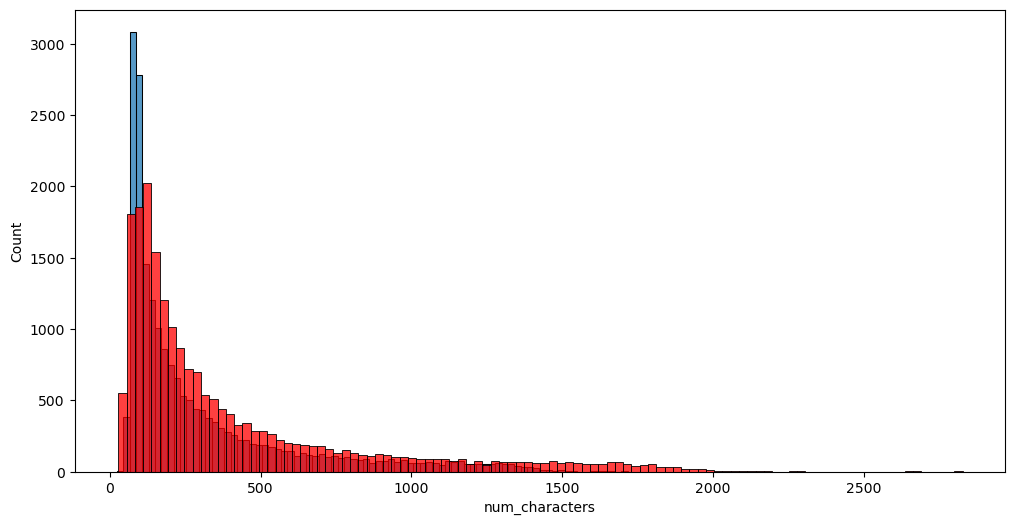

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

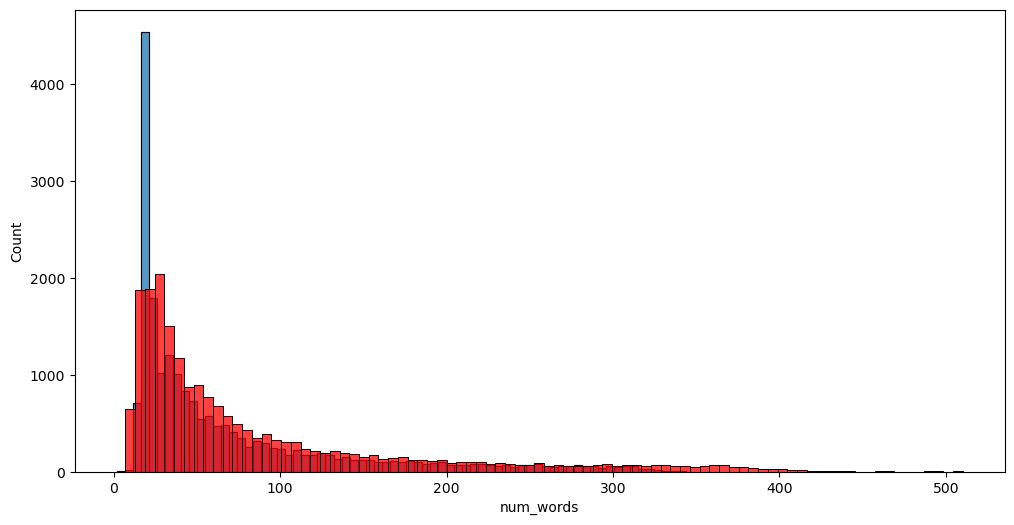

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

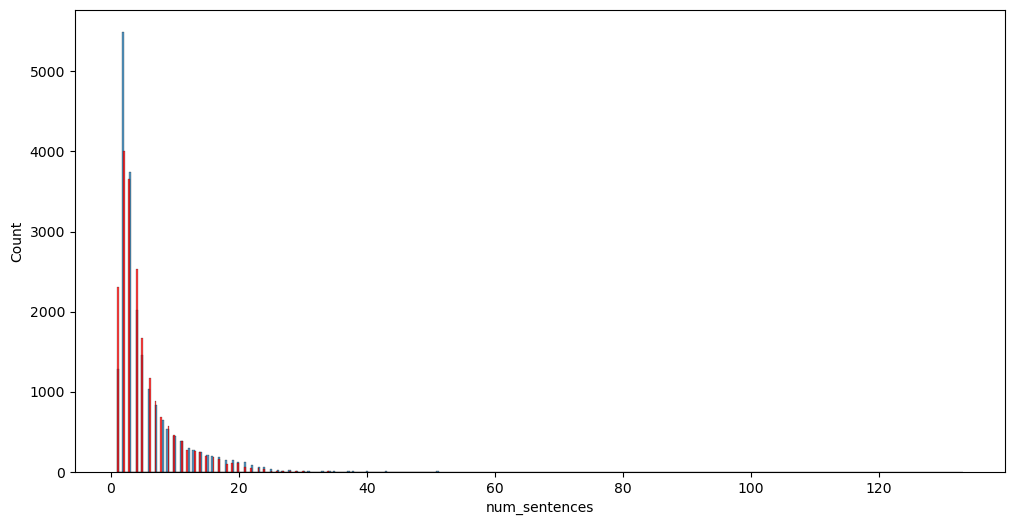

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red')

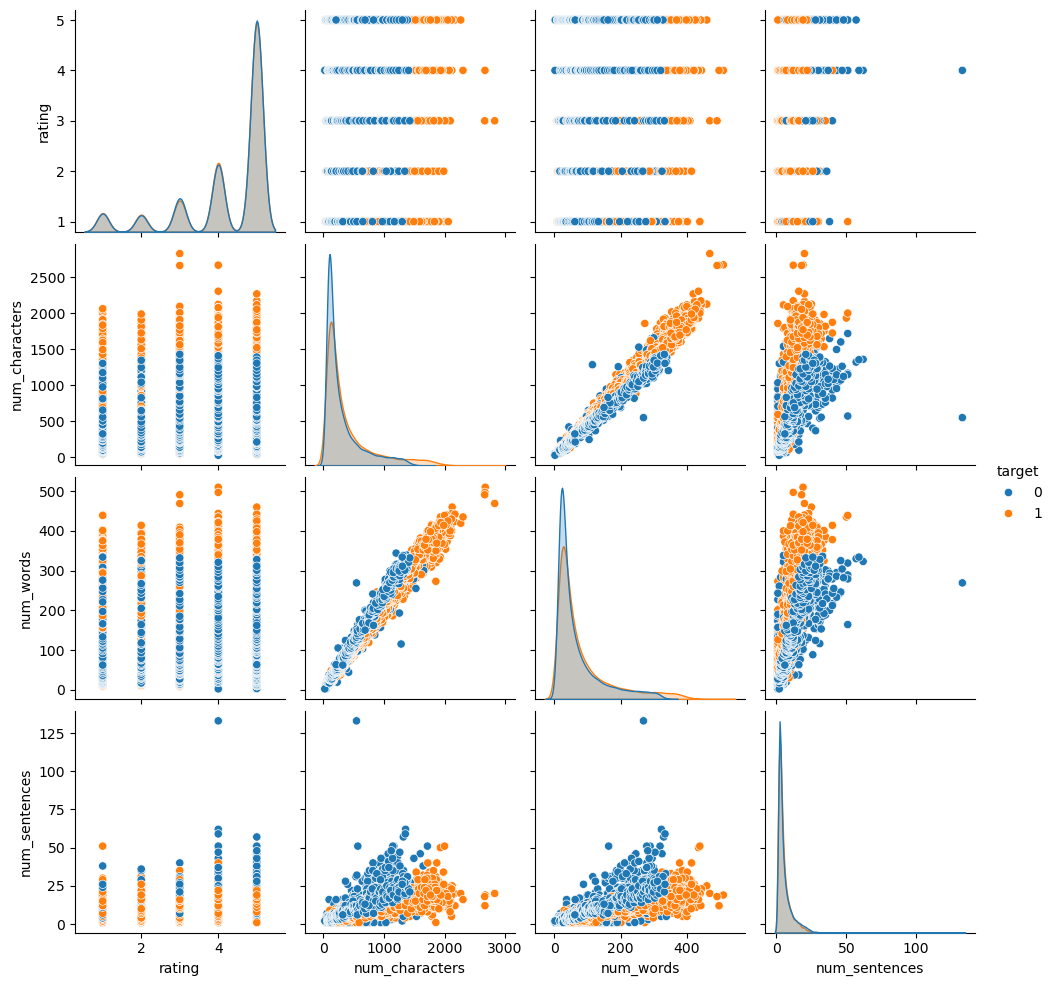

In [ ]:
sns.pairplot(df,hue='target')

<Axes: >

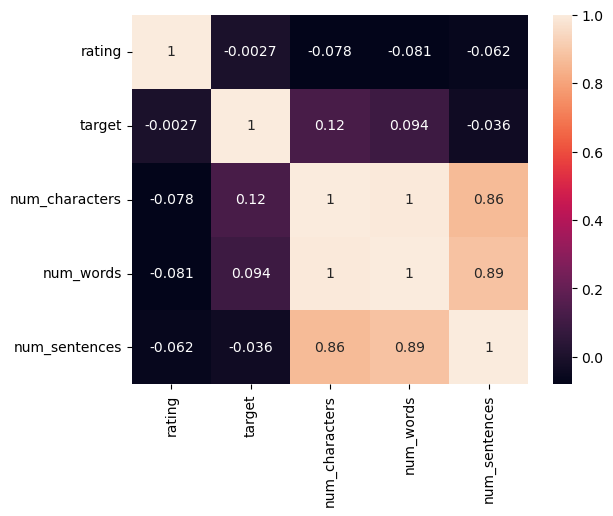

In [ ]:
corr_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=True)

# 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Load once outside the function
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

def transform_text(text):
    # Convert to lowercase and tokenize
    tokens = nltk.word_tokenize(text.lower())

    # Filter tokens and apply stemming in one pass
    processed_words = [
        ps.stem(word)
        for word in tokens
        if word.isalnum() and word not in stop_words and word not in punctuations
    ]

    return " ".join(processed_words)


In [ ]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.sample(15)

,category,rating,target,text,num_characters,num_words,num_sentences,transformed_text
19443,Pet_Supplies_5,5.0,0,I like it but my dog has a sensitive stomach. ...,70,18,2,like dog sensit stomach buy
26657,Kindle_Store_5,5.0,1,This book helps to put it all into perspective...,397,83,4,book help put perspect give ton great inform p...
559,Home_and_Kitchen_5,5.0,1,These hold my quilting rulers very well! Wish...,78,17,3,hold quilt ruler well wish would found sooner
4243,Sports_and_Outdoors_5,5.0,1,Works great - not chaffing and doesn't feel he...,56,12,1,work great chaf feel heavi
9491,Electronics_5,4.0,0,I ordered 2 of these; one for my cell phone an...,121,31,2,order 2 one cell phone one laptop one phone ca...
36709,Clothing_Shoes_and_Jewelry_5,5.0,0,I bought for a gift and it arrived on time. I ...,84,20,2,bought gift arriv time keep husband
22669,Pet_Supplies_5,5.0,0,This is great! I use it on my cat and it works...,353,82,5,great use cat work dog love bought friend smal...
20277,Pet_Supplies_5,5.0,1,If your dog has skin problems this is the grea...,110,22,2,dog skin problem greatest heal shampoo ever ye...
25386,Kindle_Store_5,5.0,0,I love this book. It is an easy read and you w...,182,38,4,love book easi read disappoint look forward re...
11620,Electronics_5,2.0,1,Adding my voice to the negative reviews about ...,1069,219,10,ad voic neg review longev cord gener construct...


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

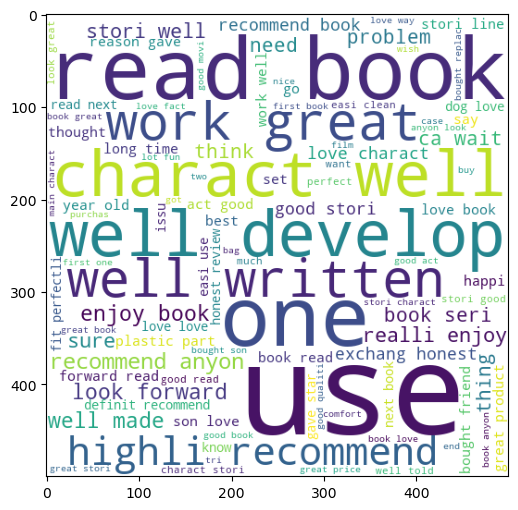

In [ ]:
computer_generated = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(computer_generated)

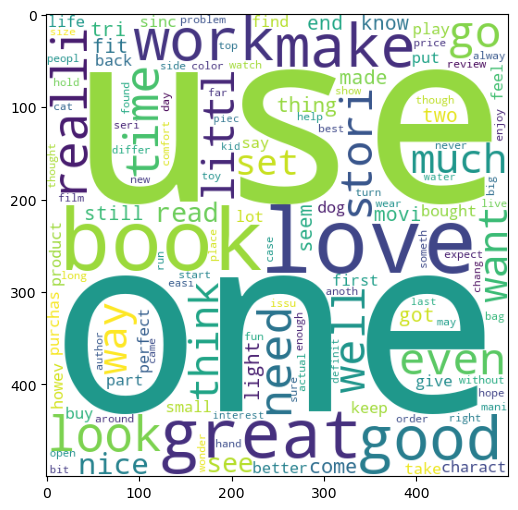

In [ ]:
original = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(original)

In [ ]:
CG_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        CG_corpus.append(word)

len(CG_corpus)

517889

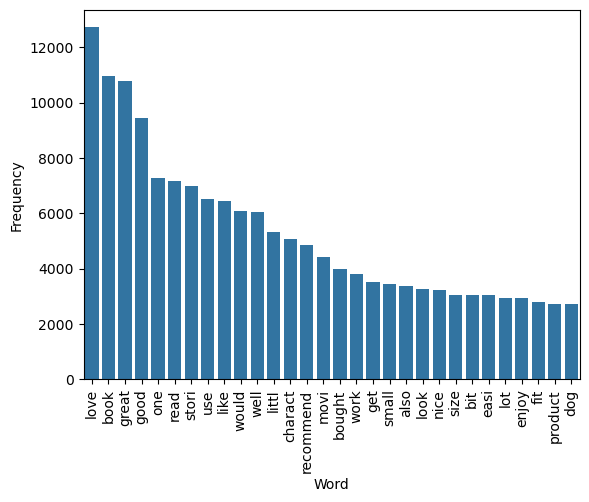

In [ ]:
from collections import Counter
common_words = pd.DataFrame(Counter(CG_corpus).most_common(30))
common_words.columns = ['Word', 'Frequency']
sns.barplot(x='Word', y='Frequency', data=common_words)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
OR_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        OR_corpus.append(word)

len(OR_corpus)

729371

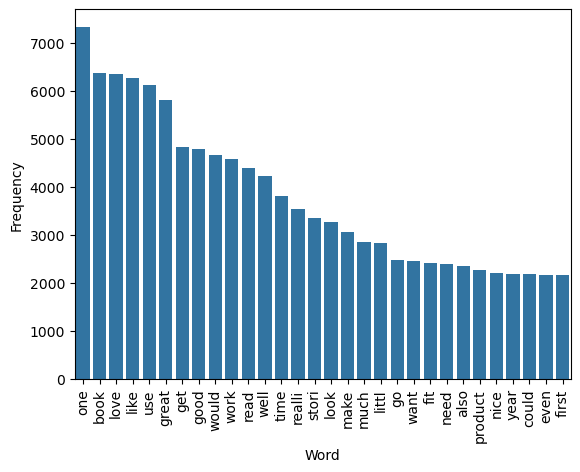

In [ ]:
common_words = pd.DataFrame(Counter(OR_corpus).most_common(30))
common_words.columns = ['Word', 'Frequency']
sns.barplot(x='Word', y='Frequency', data=common_words)
plt.xticks(rotation='vertical')
plt.show()

 ## 4. Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7383720930232558
[[3454  544]
 [1571 2515]]
0.8221641059169663


In [ ]:
bnb = BernoulliNB()

In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.7307026224641266
[[3644  354]
 [1823 2263]]
0.8647306075659151
